# hipotesis_testing
IT Academy T5.1

Exercicis d'Hipotesis Testing.

## - Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lligues europees UEFA.csv',
                 engine = 'python',
                 sep=';',
                 encoding = "ISO-8859-1",
                 index_col=0)
df

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


Explicació de les variables del dataset:
<ol>
  <li><b>Rk (Classificació):</b> Aquesta columna representa la classificació o posició d'un equip a la taula de classificació.</li>
  <li><b>Squad (Equip):</b> Aquesta columna indica el nom de l'equip de futbol al qual pertanyen les dades de la fila.</li>
  <li><b>Country (País):</b> Indica el país al qual pertany l'equip.</li>
  <li><b>LgRk (Classificació de Lliga):</b> Representa la classificació o posició de l'equip dins de la seva lliga.</li>
  <li><b>MP (Partits Jugats):</b> Mostra el nombre de partits jugats per l'equip.</li>
  <li><b>W (Victòries):</b> Indica la quantitat de partits guanyats per l'equip.</li>
  <li><b>D (Empats):</b> Mostra la quantitat de partits empatats per l'equip.</li>
  <li><b>L (Derrotes):</b> Indica la quantitat de partits perduts per l'equip.</li>
  <li><b>GF (Gols a Favor):</b> Representa la quantitat total de gols marcats per l'equip.</li>
  <li><b>GA (Gols en Contra):</b> Mostra la quantitat total de gols rebuts per l'equip.</li>
  <li><b>GD (Diferència de Gols):</b> Indica la diferència entre els gols marcats i els gols rebuts per l'equip.</li>
  <li><b>Pts (Punts):</b> Representa el nombre de punts acumulats per l'equip a la competició.</li>
  <li><b>Pts/G (Punts per Partit):</b> Mostra la mitjana de punts obtinguts per partit jugat.</li>
  <li><b>xG (Expected Goals - Gols Esperats):</b> Indica la quantitat esperada de gols que un equip hauria de haver marcat.</li>
  <li><b>xGA (Expected Goals Allowed - Gols Esperats Rebuts):</b> Representa la quantitat esperada de gols que un equip hauria de haver rebut.</li>
  <li><b>xGD (Expected Goal Difference - Diferència de Gols Esperada):</b> Indica la diferència entre els gols esperats marcats i els gols esperats rebuts per l'equip.</li>
  <li><b>xGD/90 (Expected Goal Difference per 90 minutes - Diferència de Gols Esperada per cada 90 minuts):</b> Mostra la diferència de gols esperada per cada 90 minuts jugats per l'equip.</li>
  <li><b>Last 5 (Últims 5 partits):</b> Indica el rendiment o resultats de l'equip en els seus últims 5 partits.</li>
  <li><b>Attendance (Assistència):</b> Representa la quantitat d'espectadors o aficionats que van assistir als partits de l'equip.</li>
  <li><b>Top Team Scorer (Màxim golejador de l'equip):</b> Mostra el nom del jugador que ha anotat la major quantitat de gols per a l'equip.</li>
  <li><b>Goalkeeper (Porter):</b> Indica el nom del porter titular de l'equip.</li>
</ol>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

<strong>El dataset està format per 98 files i 20 columnes<br>
No presenta valors nulls<br>
La columna 'Top Team Scorer's'ha de desagregar en nom del jugador i gols marcats</strong>


In [4]:
# Convertir columna a string   
df['Top Team Scorer'] = df['Top Team Scorer'].astype(str)

# Divisió de dades amb split
df['Top Team Scorer'] = df['Top Team Scorer'].apply(lambda x: x.split(" - "))

# Creació de nova columna per posició
df['Goals Scored'] = df['Top Team Scorer'].str[1]


In [5]:
df

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Goals Scored
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,"[Kevin De Bruyne, 15]",Ederson,15
2,Liverpool,ENG,2,36,26,8,2,89,24,65,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,"[Mohamed Salah, 22]",Alisson,22
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,"[Karim Benzema, 27]",Thibaut Courtois,27
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,"[Robert Lewandowski, 35]",Manuel Neuer,35
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,"[Kylian Mbappé, 25]",Keylor Navas,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,...,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,"[Hwang Ui-jo, 11]",Benoît Costil,11
95,Venezia,ITA,20,37,6,8,23,34,69,-35,...,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,"[Thomas Henry, 9]",Sergio Romero,9
96,Watford,ENG,19,37,6,5,26,33,75,-42,...,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,"[Emmanuel Dennis, 10]",Ben Foster,10


In [6]:
# Eliminar els gols i deixar el nom del jugador només a 'Top Team Scorer'
df['Top Team Scorer'] = df['Top Team Scorer'].str[0]

In [7]:
# Transformar 'Goals Scored' a int
df['Goals Scored'] = df['Goals Scored'].astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

/var/folders/1n/0f0l19t14jg94_xzmpbl7j780000gn/T/ipykernel_78877/921553370.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<Axes: >

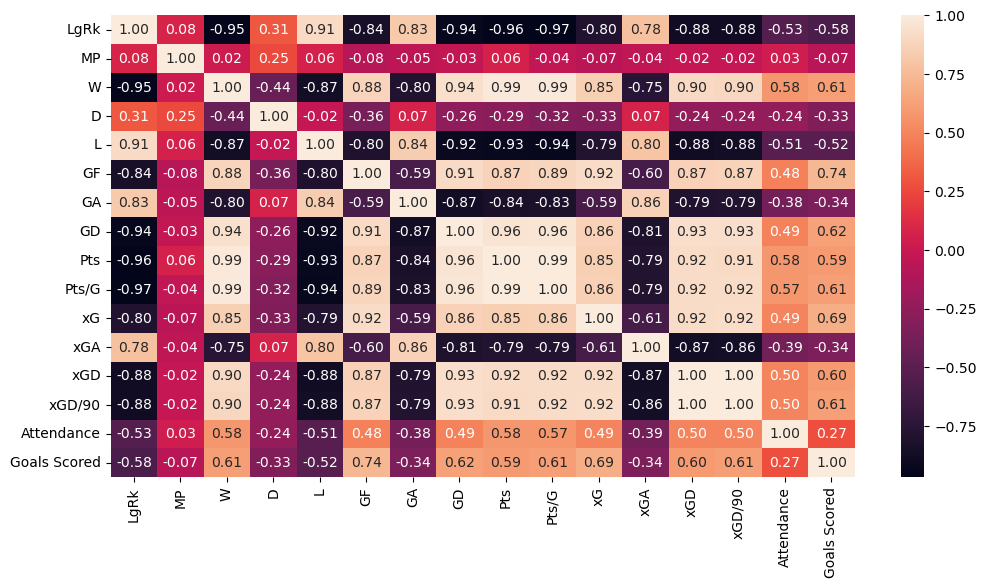

In [9]:
# Configuració de canvas
plt.figure(figsize=(12, 6))

# Explorar les correlacions entre les diferents variables
sns.heatmap(df.corr(), annot=True, fmt=".2f")

<strong>Hi ha una correlació forta (tant positiva com negativa) entre les variables del dataset.</strong>

array([[<Axes: title={'center': 'MP'}>, <Axes: title={'center': 'W'}>,
        <Axes: title={'center': 'D'}>],
       [<Axes: title={'center': 'L'}>, <Axes: title={'center': 'GF'}>,
        <Axes: title={'center': 'GA'}>],
       [<Axes: title={'center': 'GD'}>, <Axes: title={'center': 'Pts'}>,
        <Axes: title={'center': 'Pts/G'}>]], dtype=object)

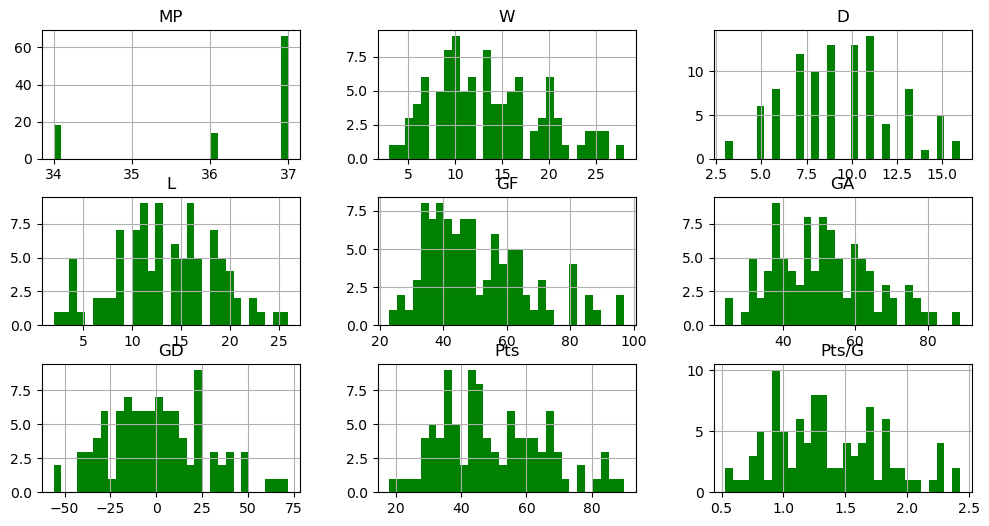

In [10]:
# Explorem les distribucions de les variables que indiquen dades dels partits
df[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G']].hist(bins=30, figsize=(12,6), color="green")

<strong>Es selecciona com a atribut del conjunt de dades la variable Diferència de Gols (GD) per comprovar si aquesta té, com sembla a l'histograma, una distribució normal </strong>

In [11]:
df['GD'].describe()

count    98.000000
mean      0.000000
std      26.501896
min     -56.000000
25%     -17.750000
50%      -1.000000
75%      17.250000
max      72.000000
Name: GD, dtype: float64

In [12]:
# Comprovar tots els països
df.groupby('Country')['GD'].describe()


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
ENG,20.0,0.0,32.437795,-56.0,-20.00,-2.0,11.00,72.0
ESP,20.0,0.0,22.249778,-33.0,-14.75,-6.5,21.25,49.0
FRA,20.0,0.0,25.474445,-41.0,-19.00,0.0,16.50,49.0
GER,18.0,0.0,27.615000,-54.0,-16.25,-3.0,10.50,60.0
ITA,20.0,0.0,26.592441,-41.0,-22.50,3.5,18.25,49.0


### Prova de Shapiro-Wilk
Comprova si una mostra de dades té una distribució gaussiana.

Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
Interpretació

#### H0: la mostra té una distribució gaussiana.

#### H1: la mostra no té una distribució gaussiana.



In [13]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df['GD'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La distribució probablement és gaussiana')
else:
    print('La distribució probablement no és gaussiana')
    
    

stat=0.986, p=0.396
La distribució probablement és gaussiana


<strong>Conclusió: podem afirmar amb un 95% de confiança que la distribució de la diferència de gols és gaussiana</strong>

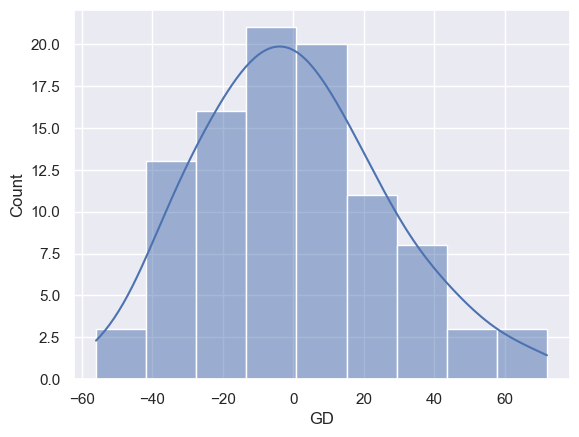

In [14]:
# histograma per veure la distribució
sns.set(style="darkgrid")
sns.histplot(df['GD'], kde=True)
plt.show()


# - Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

La tria de les variables serà:

W (Victòries): Indica la quantitat de partits guanyats per l'equip.

Goals Scored (Gols marcats): Indica els gols marcats pel màxim golejador de l'equip.



#### Coeficient de correlació de Pearson
Comprova si dues mostres tenen una relació lineal.

Suposicions

Les observacions de cada mostra són independents i estan distribuïdes de manera idèntica (iid).

Les observacions de cada mostra tenen una distribució normal.

Les observacions de cada mostra tenen la mateixa variància.

Interpretació

<strong>H0: les dues mostres són independents.</strong>

<strong>H1: hi ha una dependència entre les mostres.</strong>
    
<strong>Alpha: 0.05</strong>

In [15]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data_W = df['W']
data_GS = df['Goals Scored']
stat, p = pearsonr(data_W, data_GS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.613, p=0.000
Probably dependent


El valor del coeficient de correlació de Pearson és de 0,613. Aquest valor indica una correlació positiva moderada entre les dues variables estudiades.

Quant als valors estadístics associats, el valor p és 0,000. Aquest valor és conegut com a valor p i representa la probabilitat d'observar una correlació igual o més extrema que la que s'ha calculat, suposant que la hipòtesi nul·la és certa (és a dir, que no hi ha correlació entre les variables). En aquest cas, com el valor de p és menor de 0.05, podem concloure que hi ha evidència suficient per rebutjar la hipòtesi nul·la i afirmar que hi ha una correlació estadisticament significativa entre les dues variables. 

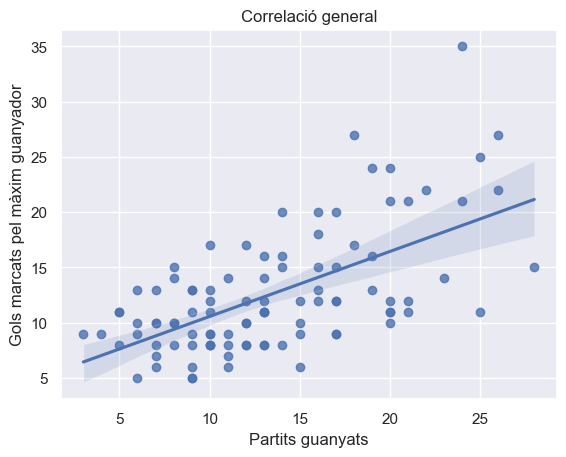

In [16]:
# Visualitzar la correlació
sns.regplot(x=df['W'], y=df['Goals Scored'])
plt.xlabel('Partits guanyats')
plt.ylabel('Gols marcats pel màxim guanyador')
plt.title('Correlació general')
plt.show()

En el scatterplot s'observa que la correlació entre ambdues variables és moderada, amb un cert grau de dispersió però mantenint la linealitat.

# - Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Les variables que s'aplicaran a aquest anàlisi son:
<ol>
    <li>GF (Gols a Favor): Representa la quantitat total de gols marcats per l'equip.</li>
    <li>Attendance (Assistència): Representa la quantitat d'espectadors o aficionats que van assistir als partits de l'equip.</li>
    <li>W (Victòries): Indica la quantitat de partits guanyats per l'equip.</li>
</ol>




#### Prova de Shapiro-Wilk
Comprova si una mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).

#### Interpretació

H0: la mostra té una distribució gaussiana.

H1: la mostra no té una distribució gaussiana.

In [18]:
# Shapiro-Wilk Normality Test
# Gols a favor
from scipy.stats import shapiro
data = df['GF']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    

stat=0.943, p=0.000
Probably not Gaussian


In [19]:
# Shapiro-Wilk Normality Test
# Assistència
from scipy.stats import shapiro
data = df['Attendance']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    

stat=0.907, p=0.000
Probably not Gaussian


In [20]:
# Shapiro-Wilk Normality Test
# Victòries
from scipy.stats import shapiro
data = df['Attendance']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    

stat=0.907, p=0.000
Probably not Gaussian


Cap de les distribucions és gaussiana, es rebutja la hipòtesi nul·la (H0). 

Procedim a fer un test ANOVA per saber si les mitjanes de les variables són significativament diferents

#### ANOVA

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid), i tenen una distribució normal

Observations in each sample are independent and identically distributed (iid). Observations in each sample are normally distributed. Observations in each sample have the same variance.

Interpretation
H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.


In [22]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = df['GF']
data2 = df['Attendance']
data3 = df['W']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement distribucions iguals')
else:
    print('Probablement distribucions diferents')

stat=259.578, p=0.000
Probablement distribucions diferents


Es rebutja doncs la hipòtesi nul·la (H0), i per tant amb el test l'ANOVA es dedueix que les mitjanes de les variables presenten una diferència significativa